In [ ]:
# q1

In [6]:
from sympy import *
import numpy as np
x = symbols('x')
diff((sin(x)+1)**sin(cos(x)))

(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))

In [7]:
def f(x):
    vals = (sin(x)+1)**sin(cos(x))
    return vals

In [8]:
def f_diff(x):
    diff = (-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))
    return diff

In [9]:
cvec = np.linspace(-np.pi, np.pi, 200)
h = np.array([f(x) for x in cvec])
f_prime = np.array([f_diff(x) for x in cvec])

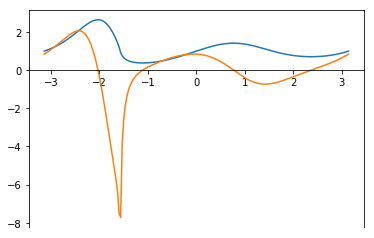

In [10]:
from matplotlib import pyplot as plt
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(cvec, h)
plt.plot(cvec, f_prime)
plt.show()

In [6]:
# q2

In [10]:
def forward_1(f, x, h):
    forward_values_1 = (f(x + h) - f(x)) / h
    return forward_values_1
def forward_2(f, x, h):
    forward_values_2 = (-3*f(x) + 4*f(x + h) - f(x + 2*h)) / (2*h)
    return forward_values_2
def backward_1(f, x, h):
    backward_values_1 = (f(x) - f(x - h)) / h
    return backward_values_1
def backward_2(f, x, h):
    backward_values_2 = (3*f(x) - 4*f(x - h) + f(x - 2*h)) / (2*h)
    return backward_values_2
def centered_1(f, x, h):
    centered_values_1 = (f(x + h) - f(x - h)) / (2*h)
    return centered_values_1
def centered_2(f, x, h):
    centered_values_2 = (f(x - 2*h) - 8*f(x - h) + 8*f(x + h) - f(x + 2*h)) / (12*h)
    return centered_values_2

In [11]:
g = 20**(-2)
f_1 = np.array([forward_1(f, x, g) for x in cvec])
f_2 = np.array([forward_2(f, x, g) for x in cvec])
b_1 = np.array([backward_1(f, x, g) for x in cvec])
b_2 = np.array([backward_2(f, x, g) for x in cvec])
c_1 = np.array([centered_1(f, x, g) for x in cvec])
c_2 = np.array([centered_2(f, x, g) for x in cvec])

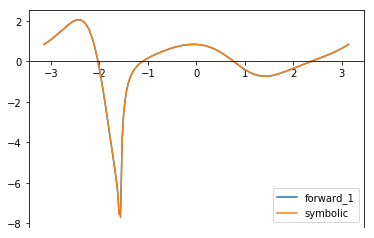

In [12]:
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(cvec, f_1)
plt.plot(cvec, f_prime)
plt.legend(['forward_1','symbolic'])

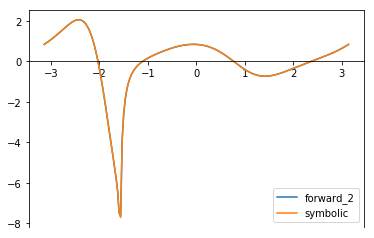

In [13]:
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(cvec, f_2)
plt.plot(cvec, f_prime)
plt.legend(['forward_2','symbolic'])

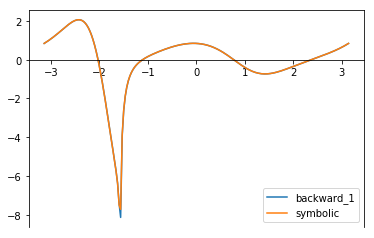

In [11]:
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(cvec, b_1)
plt.plot(cvec, f_prime)
plt.legend(['backward_1','symbolic'])

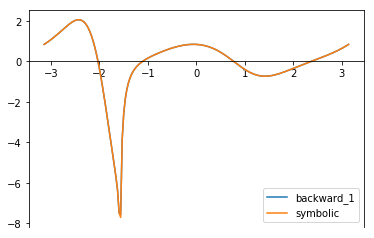

In [12]:
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(cvec, b_2)
plt.plot(cvec, f_prime)
plt.legend(['backward_1','symbolic'])

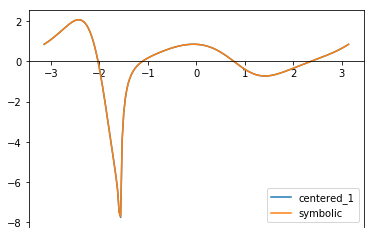

In [13]:
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(cvec, c_1)
plt.plot(cvec, f_prime)
plt.legend(['centered_1','symbolic'])

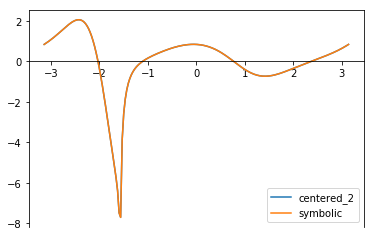

In [14]:
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(cvec, c_2)
plt.plot(cvec, f_prime)
plt.legend(['centered_2','symbolic'])

In [15]:
# q3

In [14]:
x0 = 5
f_x0 = f_diff(x0)
h_v = np.logspace(-8, 0, 9)

In [15]:
def err(fun, x, h):
    m = np.array([fun(f, x, h) for h in h_v])
    error = abs(m - f_x0)
    return error

In [18]:
forward_error_1 = err(forward_1, x0, h)
forward_error_2 = err(forward_2, x0, h)
backward_error_1 = err(backward_1, x0, h)
backward_error_2 = err(backward_2, x0, h)
centered_error_1 = err(centered_1, x0, h)
centered_error_2 = err(centered_2, x0, h)

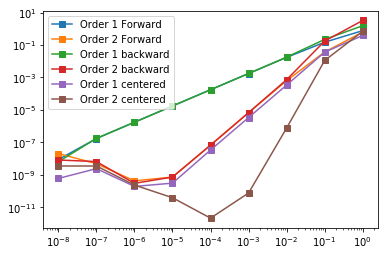

In [19]:
plt.loglog(h_v, forward_error_1, marker = 's')
plt.loglog(h_v, forward_error_2, marker = 's')
plt.loglog(h_v, backward_error_1, marker = 's')
plt.loglog(h_v, backward_error_2, marker = 's')
plt.loglog(h_v, centered_error_1, marker = 's')
plt.loglog(h_v, centered_error_2, marker = 's')
plt.legend(['Order 1 Forward','Order 2 Forward','Order 1 backward','Order 2 backward','Order 1 centered','Order 2 centered'], loc = 'upper left')


In [20]:
# q4

In [50]:
plane = np.load('plane.npy')

In [51]:
a = 500
def x_angle(alpha, beta):
    x_a = a*tan(beta)/(tan(beta) - tan(alpha))
    return x_a
def y_angle(alpha, beta):
    y_a = a*tan(beta)*tan(alpha)/(tan(beta) - tan(alpha))
    return y_a

In [52]:
t = []
a0 = []
b0 = []
for i in range(len(plane)):
    u = np.deg2rad(plane[i][1]) 
    v = np.deg2rad(plane[i][2])
    t.append(plane[i][0])
    a0.append(u)
    b0.append(v)
x_list = list(map(x_angle, a0, b0))
y_list = list(map(y_angle, a0, b0))

In [58]:
y_list

[1962.45623877580,
 1975.11450516313,
 1987.34601606186,
 2000.84071299288,
 2013.51241079397,
 2025.79223350439,
 2040.99058265381,
 2055.06557068017]

In [71]:
def forward(t):
    x_prime = (x_list[t - 7 + 1] - x_list[t-7]) / 1
    y_prime = (y_list[t - 7 + 1] - y_list[t-7]) / 1
    return[x_prime, y_prime]
def backward(t):
    x_prime = (x_list[t - 7] - x_list[t - 7 - 1]) / 1
    y_prime = (y_list[t - 7] - y_list[t - 7 - 1]) / 1
    return [x_prime, y_prime]
def centered(t):
    x_prime = (x_list[t - 7 + 1]) - x_list[t - 7 - 1] / 2
    y_prime = (y_list[t - 7 + 1] - y_list[t - 7 - 1]) / 2
    return [x_prime, y_prime]

In [76]:
sp = []
for t0 in t:
    if t0 == 7:
        x_y = forward(int(t0))
        s = (x_y[0]**2 + x_y[1]**2)**0.5
        sp.append(s)
    elif t0 == 14:
        x_y = backward(int(t0))
        s = (x_y[0]**2 + x_y[1]**2)**0.5
        sp.append(s)
    else:
        x_y = centered(int(t0))
        s = (x_y[0]**2 + x_y[1]**2)**0.5
        sp.append(s)

In [80]:
import pandas as pd
dic = {'t':t, 'speed':sp}
df = pd.DataFrame(data = dic)
df


,t,speed
0,7.0,46.4242006221339
1,8.0,746.386487269417
2,9.0,772.635850274127
3,10.0,797.788436193119
4,11.0,818.645519252559
5,12.0,848.832403456947
6,13.0,875.818927997079
7,14.0,51.5148005696361


In [ ]:
# q5

In [21]:
def f_value(x, y):
    value = [[x**2], [x**3 - y]]
    return value

In [22]:
def f_prime_1(f, x, h):
    x_1 = x[0][0]
    y_1 = x[1][0]
    c_1 = (np.array(f_value(x_1 + h, y_1)) - np.array(f_value(x_1 - h, y_1))) / (2*h)
    c_2 = (np.array(f_value(x_1, y_1 + h)) - np.array(f_value(x_1, y_1 - h))) / (2*h)
    list_1 = c_1.tolist()
    list_2 = c_2.tolist()
    mx = [list_1[0][0], list_2[0][0]], [list_1[1][0], list_2[1][0]]
    return mx

In [23]:
x_g = [[1], [1]]
f_prime_1(f_value, x_g, g)

([1.9999999999999574, 0.0], [3.0000062499999203, -0.9999999999999787])

In [24]:
# q7

In [1]:
from autograd import numpy as anp
from autograd import grad
import random
import time

In [24]:
l = 10**(-2)
p = lambda x: (anp.sin(x) + 1)**anp.sin(anp.cos(x))
sympy_time = []
sympy_error = []
dq_time = []
dq_error = []
autograd_time = []
autograd_error = []

In [25]:
def call_time(n):
    for i in range(n):
        x0 = random.uniform(-2*np.pi, 2*np.pi)
        # sympy
        sympy_s = time.time()
        sympy_value = f_diff(x0)
        sympy_end = time.time()
        sympy_t = sympy_end - sympy_s
        sympy_time.append(sympy_t)
        sympy_error.append(1e-18)
        # difference quotient
        dq_s = time.time()
        dq_value = centered_2(f, x0, l)
        dq_end = time.time()
        dq_t = dq_end - dq_s
        dq_e = abs(dq_value - sympy_value)
        dq_time.append(dq_t)
        dq_error.append(dq_e)
        # autograd
        autograd_s = time.time()
        ag = grad(p)
        autograd_value = ag(x0)
        autograd_end = time.time()
        autograd_t = autograd_end - autograd_s
        autograd_e = abs(autograd_value - sympy_value)
        autograd_time.append(autograd_t)
        autograd_error.append(autograd_e)


In [26]:
call_time(200)

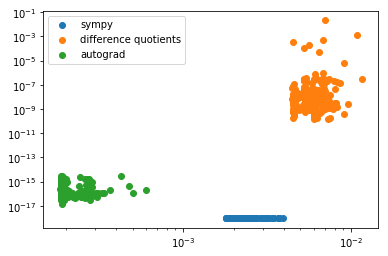

In [29]:
plt.xscale("log")
plt.yscale("log")
plt.scatter(sympy_time, sympy_error)
plt.scatter(dq_time, dq_error)
plt.scatter(autograd_time, autograd_error)
plt.legend(['sympy', 'difference quotients', 'autograd'], loc = 'upper left')
